<a href="https://colab.research.google.com/github/ENKI0311/2024_Election_Sentiment/blob/main/Election_2024_Polling_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

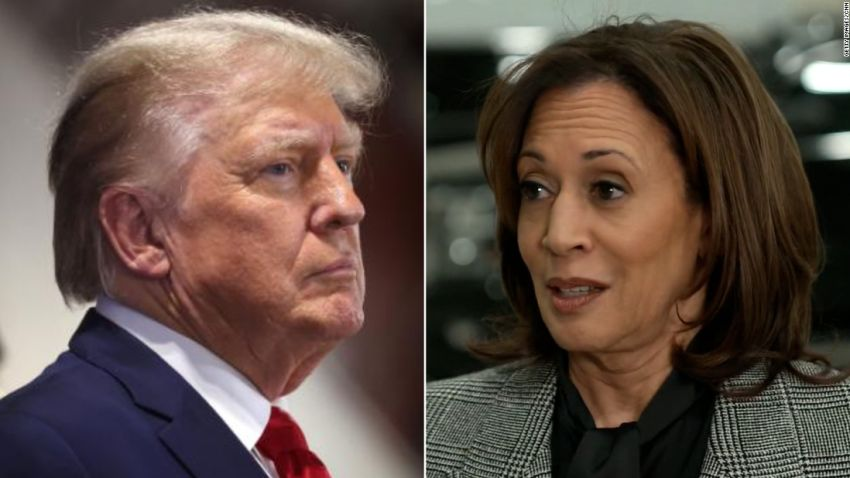

# 2024 US Presidential Election
## Stats and raw data leading into the 2024 political spectacle


About Dataset

OCTOBER UPDATE: The past month has been typical of the final weeks before the election - rallies, interviews, and advertising. This update includes a transcript of the VP debate between Walz and Vance, and the latest poll summaries.

SEPTEMBER UPDATE: Trump and Harris had their first debate. This update includes the transcript and recent poll results. Also, there was a second attempt to kill former President Trump! You'll see aerial diagrams of both attempts in the dataset.

https://www.kaggle.com/datasets/jpmiller/elections/data


By: John Chilton

# Load the Libraries used

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load Google Drive for access to Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the Data Files

In [4]:
df = pd.read_csv('/content/drive/MyDrive/lab_mount/2024_Election_Data/538_polls.csv')



---





*   Observations
*   Sanity Checks



In [5]:
df.head(10)

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,hypothetical,party,answer,candidate_id,candidate_name,pct
0,88707,235,InsiderAdvantage,NaN,NaN,InsiderAdvantage,243,InsiderAdvantage,2.0,-0.3,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,47.0
1,88707,235,InsiderAdvantage,NaN,NaN,InsiderAdvantage,243,InsiderAdvantage,2.0,-0.3,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,49.0
2,88715,770,TIPP,NaN,NaN,TIPP Insights,144,TIPP Insights,1.8,-0.4,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,50.0
3,88715,770,TIPP,NaN,NaN,TIPP Insights,144,TIPP Insights,1.8,-0.4,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,46.0
4,88710,568,YouGov,352,Economist,YouGov,391,YouGov,3.0,-1.1,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,48.0
5,88710,568,YouGov,352,Economist,YouGov,391,YouGov,3.0,-1.1,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,45.0
6,88710,568,YouGov,352,Economist,YouGov,391,YouGov,3.0,-1.1,...,general,False,False,NaN,False,GRE,Stein,31116,Jill Stein,1.0
7,88710,568,YouGov,352,Economist,YouGov,391,YouGov,3.0,-1.1,...,general,False,False,NaN,False,IND,West,31097,Cornel West,1.0
8,88710,568,YouGov,352,Economist,YouGov,391,YouGov,3.0,-1.1,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,49.0
9,88710,568,YouGov,352,Economist,YouGov,391,YouGov,3.0,-1.1,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,45.0


In [6]:
df.tail(10)

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,hypothetical,party,answer,candidate_id,candidate_name,pct
15624,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,DEM,Biden,19368,Joe Biden,45.0
15625,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,REP,Trump,16651,Donald Trump,28.0
15626,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,DEM,Biden,19368,Joe Biden,46.0
15627,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,REP,Cruz,16641,Ted Cruz,24.0
15628,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,DEM,Biden,19368,Joe Biden,41.0
15629,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,REP,DeSantis,16646,Ron DeSantis,25.0
15630,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,DEM,Biden,19368,Joe Biden,44.0
15631,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,REP,Haley,16640,Nikki Haley,19.0
15632,74681,1674,PEM Management Corporation,1629,John Bolton Super PAC,PEM Management Corporation,675,PEM Management Corporation,NaN,NaN,...,general,False,False,NaN,True,DEM,Biden,19368,Joe Biden,46.4
15633,74681,1674,PEM Management Corporation,1629,John Bolton Super PAC,PEM Management Corporation,675,PEM Management Corporation,NaN,NaN,...,general,False,False,NaN,True,REP,Trump,16651,Donald Trump,42.2


In [7]:
df.dtypes

,0
poll_id,int64
pollster_id,int64
pollster,object
sponsor_ids,object
sponsors,object
display_name,object
pollster_rating_id,int64
pollster_rating_name,object
numeric_grade,float64
pollscore,float64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   poll_id                    15634 non-null  int64  
 1   pollster_id                15634 non-null  int64  
 2   pollster                   15634 non-null  object 
 3   sponsor_ids                7537 non-null   object 
 4   sponsors                   7537 non-null   object 
 5   display_name               15634 non-null  object 
 6   pollster_rating_id         15634 non-null  int64  
 7   pollster_rating_name       15634 non-null  object 
 8   numeric_grade              13771 non-null  float64
 9   pollscore                  13785 non-null  float64
 10  methodology                14649 non-null  object 
 11  transparency_score         12425 non-null  float64
 12  state                      8133 non-null   object 
 13  start_date                 15634 non-null  obj

In [9]:
df.shape

(15634, 52)

In [10]:
df.isnull().sum()

,0
poll_id,0
pollster_id,0
pollster,0
sponsor_ids,8097
sponsors,8097
display_name,0
pollster_rating_id,0
pollster_rating_name,0
numeric_grade,1863
pollscore,1849


In [11]:
df.describe().sum().T

,0
poll_id,5.266503e+05
pollster_id,2.325760e+04
pollster_rating_id,1.809735e+04
numeric_grade,1.378383e+04
pollscore,1.378412e+04
transparency_score,1.246386e+04
sponsor_candidate_id,1.818043e+05
endorsed_candidate_id,0.000000e+00
endorsed_candidate_name,0.000000e+00
endorsed_candidate_party,0.000000e+00


In [13]:
df.duplicated().sum().T

0

In [15]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
15629,False
15630,False
15631,False
15632,False


In [15]:
df

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,hypothetical,party,answer,candidate_id,candidate_name,pct
0,88707,235,InsiderAdvantage,NaN,NaN,InsiderAdvantage,243,InsiderAdvantage,2.0,-0.3,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,47.0
1,88707,235,InsiderAdvantage,NaN,NaN,InsiderAdvantage,243,InsiderAdvantage,2.0,-0.3,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,49.0
2,88715,770,TIPP,NaN,NaN,TIPP Insights,144,TIPP Insights,1.8,-0.4,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,50.0
3,88715,770,TIPP,NaN,NaN,TIPP Insights,144,TIPP Insights,1.8,-0.4,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,46.0
4,88710,568,YouGov,352,Economist,YouGov,391,YouGov,3.0,-1.1,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,REP,DeSantis,16646,Ron DeSantis,25.0
15630,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,DEM,Biden,19368,Joe Biden,44.0
15631,74812,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,2.8,-0.9,...,general,False,False,NaN,True,REP,Haley,16640,Nikki Haley,19.0
15632,74681,1674,PEM Management Corporation,1629,John Bolton Super PAC,PEM Management Corporation,675,PEM Management Corporation,NaN,NaN,...,general,False,False,NaN,True,DEM,Biden,19368,Joe Biden,46.4


In [17]:
fig = px.histogram(df, x='pollscore')
fig.show()

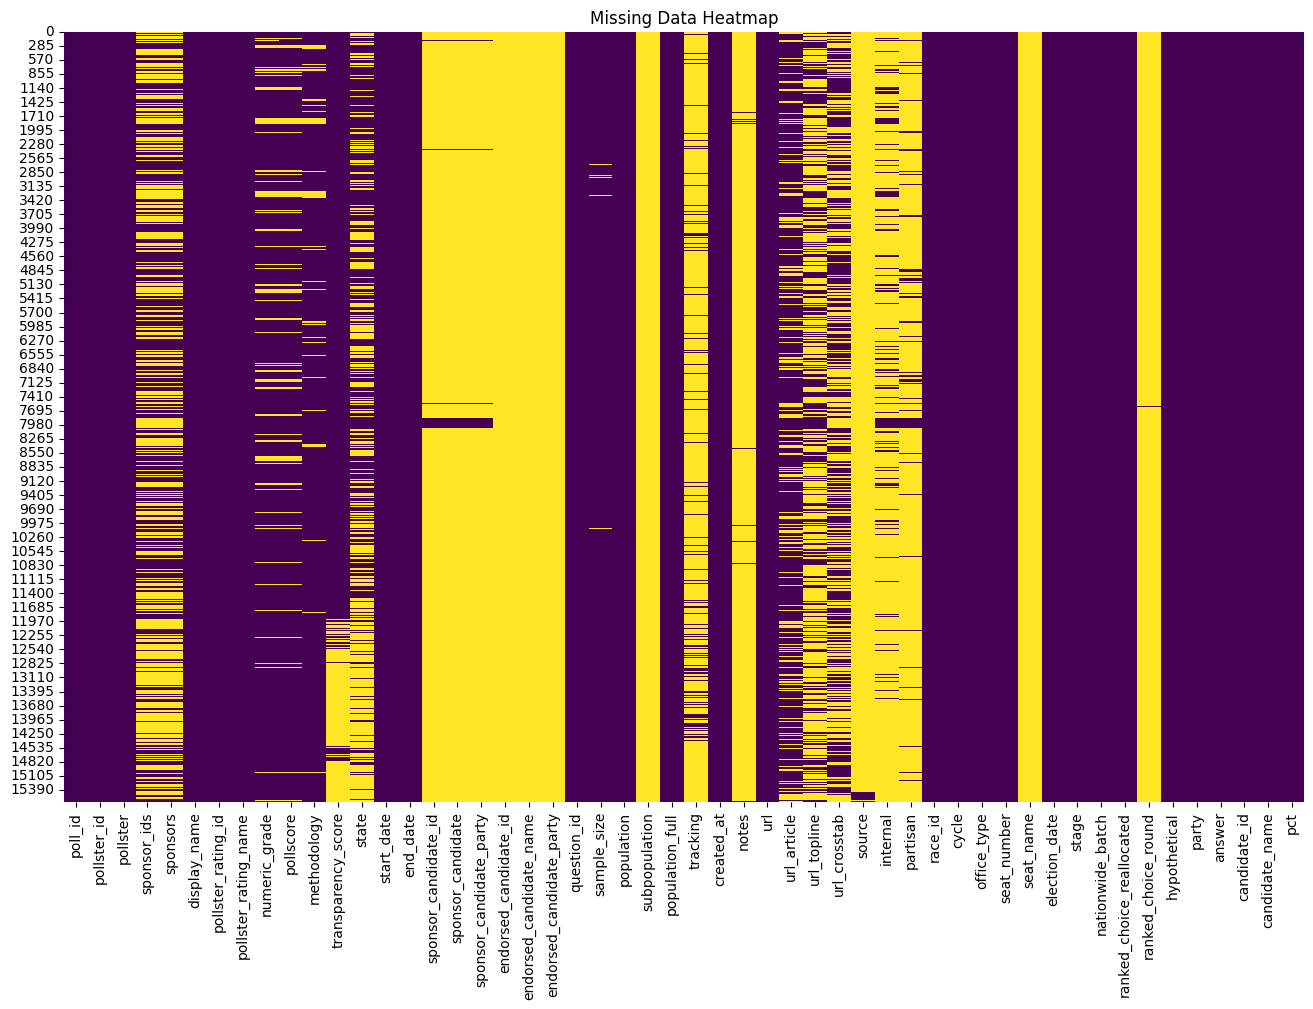

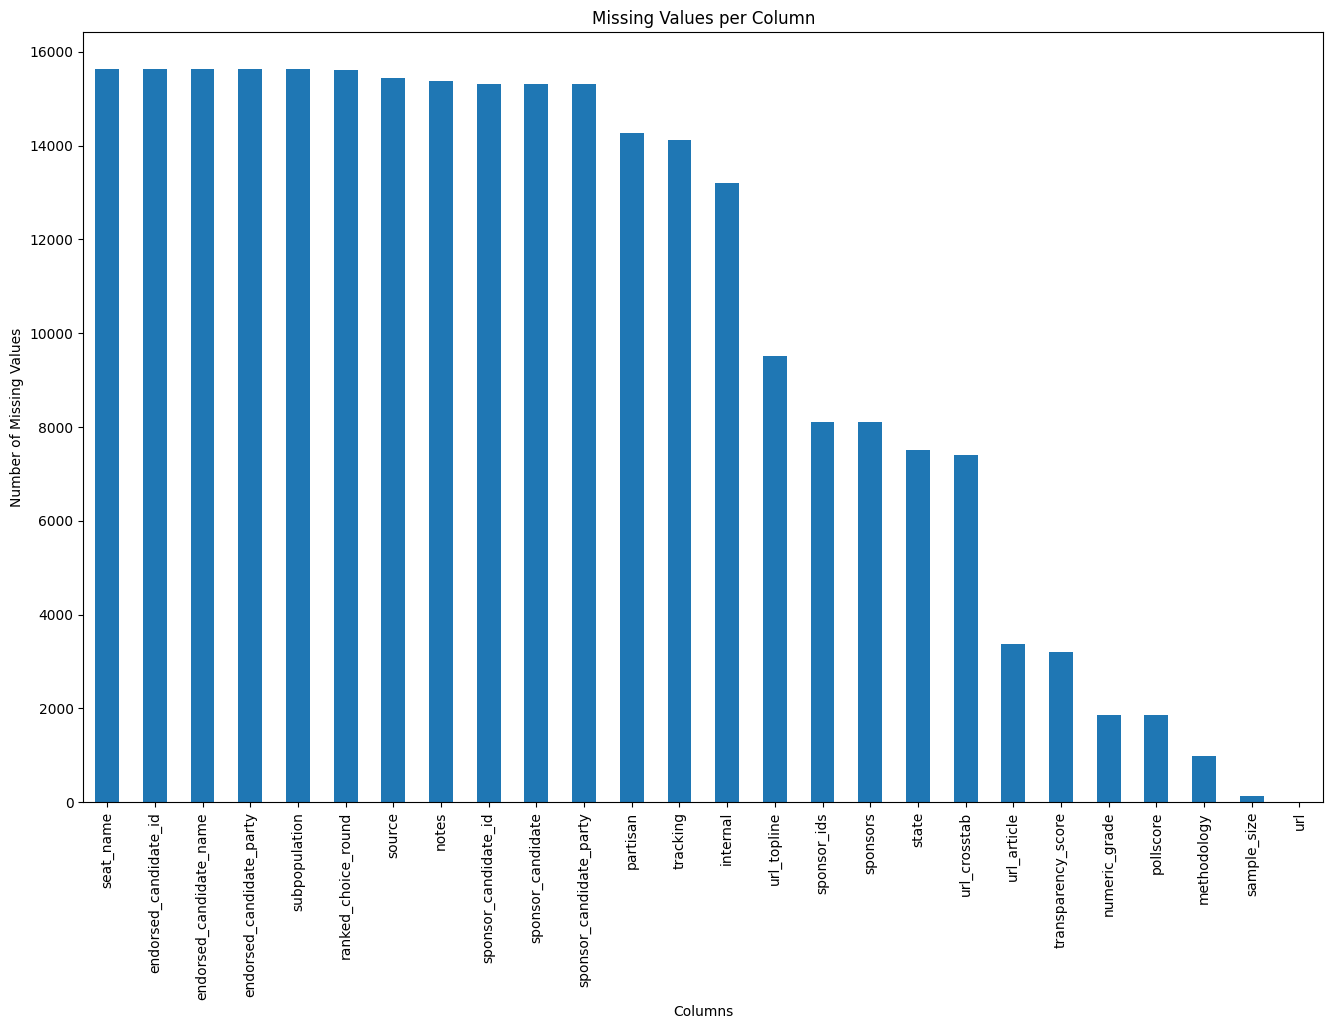

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values across the dataset
plt.figure(figsize=(16, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Bar plot of missing values by column
plt.figure(figsize=(16, 10))
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False).plot(kind='bar')
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.show()

In [20]:
# View rows with more than 50% missing values
high_missing_rows = df[df.isnull().sum(axis=1) > (df.shape[1] / 2)]
high_missing_rows.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,hypothetical,party,answer,candidate_id,candidate_name,pct


In [21]:
import pandas as pd

# Sample setup to identify columns with the highest missing values
missing_threshold = 0.5  # Columns with more than 50% missing values
high_missing_cols = df.columns[df.isnull().mean() > missing_threshold]

# Dropping rows where all of the highest missing columns are NaN
df_filtered = df.dropna(subset=high_missing_cols, how='all')

# Display the new shape to confirm the number of rows and columns after filtering
print("Original shape:", df.shape)
print("Filtered shape:", df_filtered.shape)

# Optionally, if needed, drop columns entirely if they have extremely high missing values
df_filtered = df_filtered.drop(columns=high_missing_cols)

print("Shape after dropping high-missing-value columns:", df_filtered.shape)

# Confirm the number of missing values in the filtered DataFrame
print("Remaining missing values:", df_filtered.isnull().sum())


Original shape: (15634, 52)
Filtered shape: (12646, 52)
Shape after dropping high-missing-value columns: (12646, 35)
Remaining missing values: poll_id                         0
pollster_id                     0
pollster                        0
display_name                    0
pollster_rating_id              0
pollster_rating_name            0
numeric_grade                1679
pollscore                    1665
methodology                   759
transparency_score           2268
state                        5927
start_date                      0
end_date                        0
question_id                     0
sample_size                   137
population                      0
population_full                 0
created_at                      0
url                             0
url_article                  2587
url_crosstab                 6423
race_id                         0
cycle                           0
office_type                     0
seat_number                     0
electio

In [22]:
# Impute numeric columns with median
for col in ['numeric_grade', 'pollscore', 'sample_size']:
    df_filtered[col].fillna(df_filtered[col].median(), inplace=True)

# Impute categorical columns with mode or "Unknown"
df_filtered['methodology'].fillna(df_filtered['methodology'].mode()[0], inplace=True)
df_filtered['state'].fillna("Unknown", inplace=True)
df_filtered['transparency_score'].fillna("Unknown", inplace=True)

# Impute URL columns with placeholder text
df_filtered['url_article'].fillna("No URL", inplace=True)
df_filtered['url_crosstab'].fillna("No URL", inplace=True)

# Confirm no missing values remain in essential columns
print("Remaining missing values after imputation:", df_filtered.isnull().sum())


Remaining missing values after imputation: poll_id                      0
pollster_id                  0
pollster                     0
display_name                 0
pollster_rating_id           0
pollster_rating_name         0
numeric_grade                0
pollscore                    0
methodology                  0
transparency_score           0
state                        0
start_date                   0
end_date                     0
question_id                  0
sample_size                  0
population                   0
population_full              0
created_at                   0
url                          0
url_article                  0
url_crosstab                 0
race_id                      0
cycle                        0
office_type                  0
seat_number                  0
election_date                0
stage                        0
nationwide_batch             0
ranked_choice_reallocated    0
hypothetical                 0
party                      

In [23]:
# Save the cleaned DataFrame to a CSV file
df_filtered.to_csv('/content/cleaned_538_polls.csv', index=False)


# EDA

### Exploratory Data Analysis (EDA) Summary

The EDA provided key insights into the structure and distribution of the polling data:

- **Pollscore**: The scores are mostly centered around 0, suggesting a balanced view with slight negative and positive deviations across polls.
- **Numeric Grade**: Pollsters generally cluster around a grade of 2, indicating average ratings, with a noticeable segment rated near 3, representing higher credibility.
- **Sample Size**: The sample sizes are skewed towards smaller numbers, with only a few large-sample polls, which is typical due to logistical challenges in polling.
- **Party Representation**: The data heavily features the Democratic and Republican parties, with fewer polls involving third-party groups like Green and Libertarian.
- **Percentage Support (Pct)**: Candidate support percentages mainly fall between 40-50%, likely indicating primary contenders, while lower percentages capture minor or fringe candidates.

This initial EDA gives a solid foundation for further analysis, such as assessing relationships between poll ratings, sample size, and candidate support trends.

# Univariate Analysis

# Distribution of Pollscore

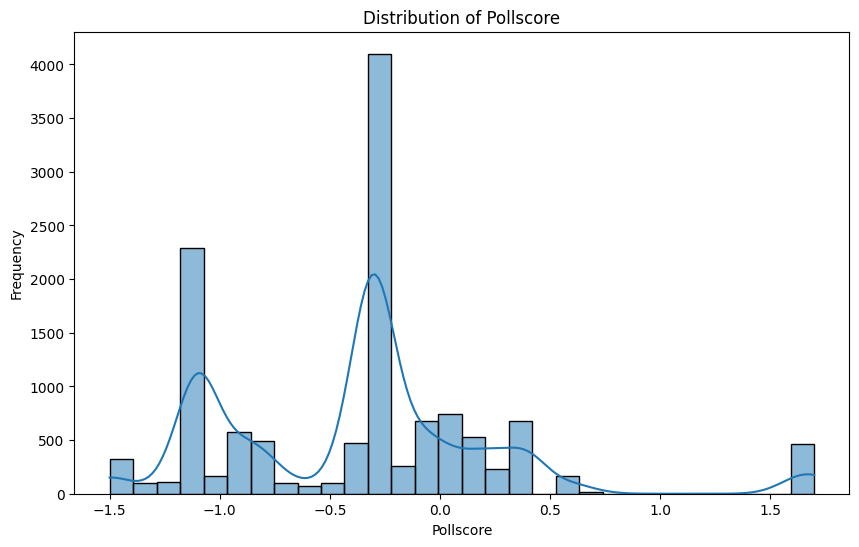

In [24]:
# Distribution of the 'pollscore' column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['pollscore'], bins=30, kde=True)
plt.title("Distribution of Pollscore")
plt.xlabel("Pollscore")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of pollscore values, with a noticeable peak around 0 and some other clusters around -1 and positive values. This distribution suggests that most polls are centered around a neutral or slightly negative score, with fewer polls scoring highly or very negatively.

# Distribution of numeric_grade

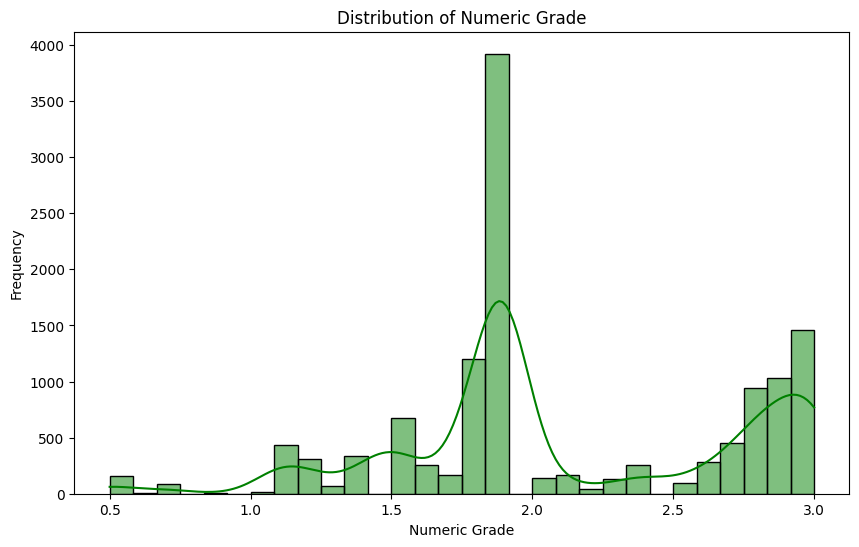

In [25]:
# Distribution of the 'numeric_grade' column
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['numeric_grade'], bins=30, kde=True, color='green')
plt.title("Distribution of Numeric Grade")
plt.xlabel("Numeric Grade")
plt.ylabel("Frequency")
plt.show()

The numeric_grade distribution shows a significant concentration around a grade of 2, with additional peaks near the higher end (around 3). This suggests that most pollsters are rated around the middle of the grading scale, with a fair number achieving high ratings.

# Sample Size Distribution

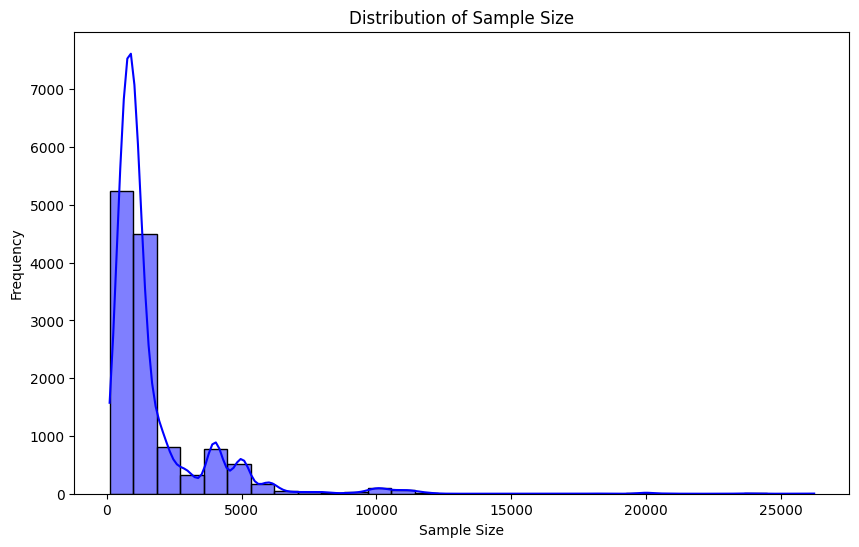

In [26]:
# Distribution of the 'sample_size' column
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['sample_size'], bins=30, kde=True, color='blue')
plt.title("Distribution of Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Frequency")
plt.show()

The sample_size distribution is highly skewed, with most polls conducted on smaller sample sizes, and a few polls with very large samples (10,000+). This is typical for polling data, where larger samples are less common due to cost and logistics.

# Distribution of Responses by Party

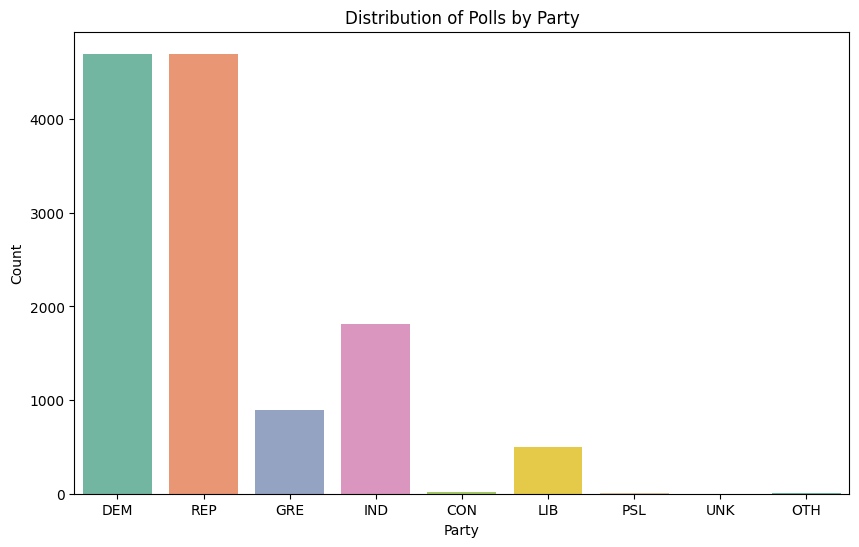

In [27]:
# Distribution of the 'party' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='party', palette='Set2')
plt.title("Distribution of Polls by Party")
plt.xlabel("Party")
plt.ylabel("Count")
plt.show()

The distribution of polls by party shows that the majority of responses are associated with the Democratic (DEM) and Republican (REP) parties, with fewer polls involving other parties like the Green (GRE), Independent (IND), and Libertarian (LIB) parties.

# Percentage (pct) Distribution by Candidate

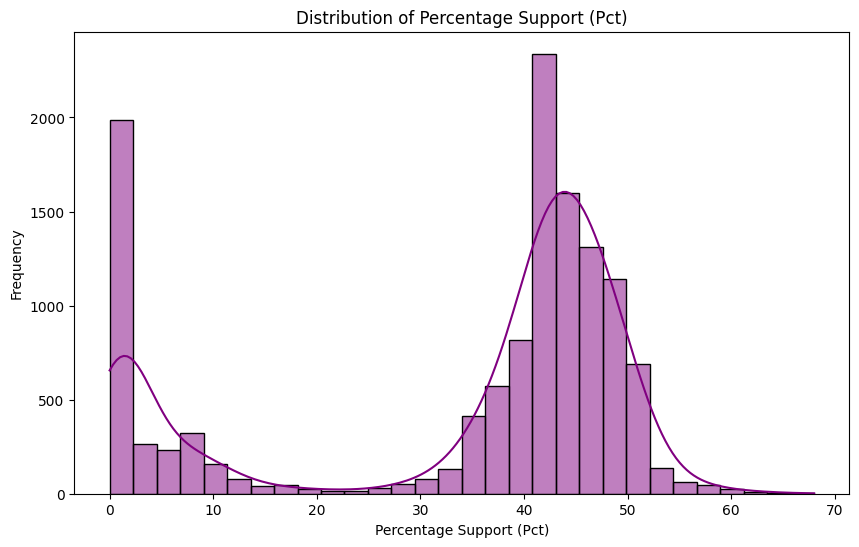

In [28]:
# Distribution of the 'pct' column
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['pct'], bins=30, kde=True, color='purple')
plt.title("Distribution of Percentage Support (Pct)")
plt.xlabel("Percentage Support (Pct)")
plt.ylabel("Frequency")
plt.show()

The distribution of percentage support (pct) shows a clear peak around 40-50%, indicating that many polls show a candidate receiving support within this range. There's also a substantial amount of low percentages, likely representing minor candidates or fringe options in multi-candidate polls.

# Summary of EDA Visualizations So Far

Pollscore: Mostly centered around 0, with a spread on both negative and positive sides.
Numeric Grade: Concentrated around 2, with a secondary peak near 3.
Sample Size: Skewed distribution with most polls having smaller sample sizes.
Party: Primarily Democratic and Republican polls, with other parties less represented.
Percentage Support (Pct): Major peak around 40-50%, likely reflecting primary candidate support.

# Bivariate Analysis

# Pollscore vs. Numeric Grade

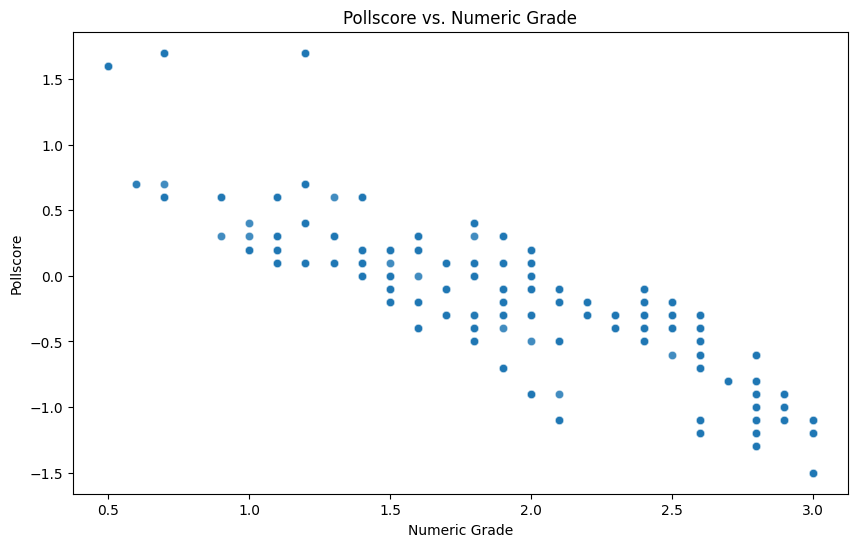

In [29]:
# Bivariate Analysis: Pollscore vs. Numeric Grade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='numeric_grade', y='pollscore', alpha=0.6)
plt.title("Pollscore vs. Numeric Grade")
plt.xlabel("Numeric Grade")
plt.ylabel("Pollscore")
plt.show()

The scatter plot of Pollscore vs. Numeric Grade reveals a slight negative correlation, suggesting that higher-rated pollsters (higher numeric grades) tend to report lower poll scores. This could indicate that more rigorous pollsters often produce less optimistic scores or tend to be more conservative in their ratings.

# Sample Size vs. Percentage Support (Pct)

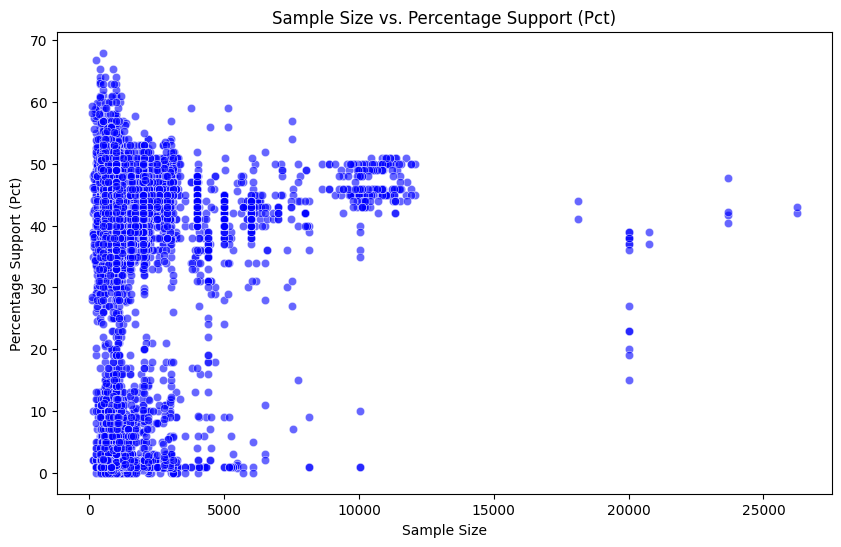

In [30]:
# Bivariate Analysis: Sample Size vs. Percentage Support (Pct)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='sample_size', y='pct', alpha=0.6, color='blue')
plt.title("Sample Size vs. Percentage Support (Pct)")
plt.xlabel("Sample Size")
plt.ylabel("Percentage Support (Pct)")
plt.show()

The scatter plot for Sample Size vs. Percentage Support (Pct) indicates that most polls are conducted with sample sizes under 5,000. While there’s a spread of percentage support across sample sizes, there doesn’t appear to be a strong relationship between sample size and support level. This suggests that smaller samples may still yield a representative range of support percentages.

# Party vs. Percentage Support (Pct)

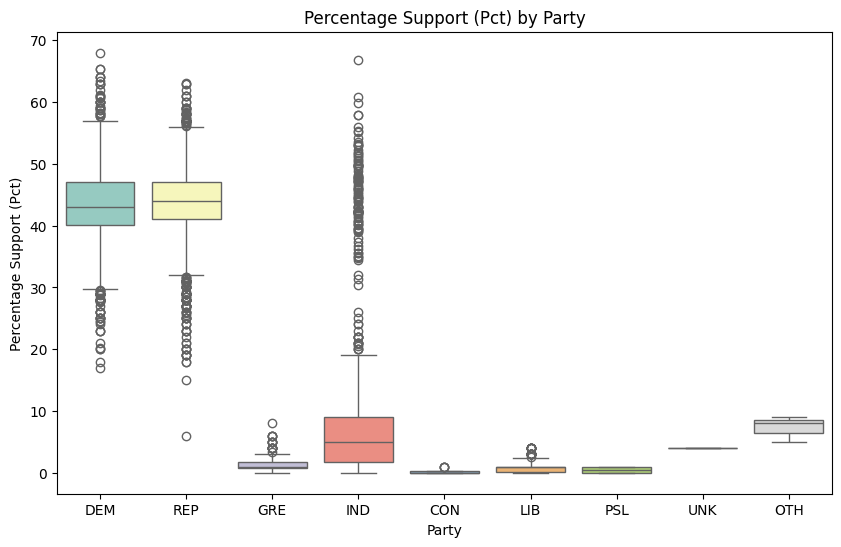

In [31]:
# Bivariate Analysis: Party vs. Percentage Support (Pct)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='party', y='pct', palette='Set3')
plt.title("Percentage Support (Pct) by Party")
plt.xlabel("Party")
plt.ylabel("Percentage Support (Pct)")
plt.show()

The box plot shows the distribution of percentage support (pct) across different parties:

Democratic (DEM) and Republican (REP) parties have median support around 40-50%, with similar spreads, which aligns with them being the dominant parties.
Independent (IND) candidates have more variation, with lower median support but a broader range of outliers.
Smaller parties, such as Green (GRE) and Libertarian (LIB), show consistently lower support levels, as expected.
This visualization suggests that support varies significantly by party, with the two main parties consistently achieving higher percentages, while smaller parties and independents see more scattered, typically lower support.

# Pollscore by Party.

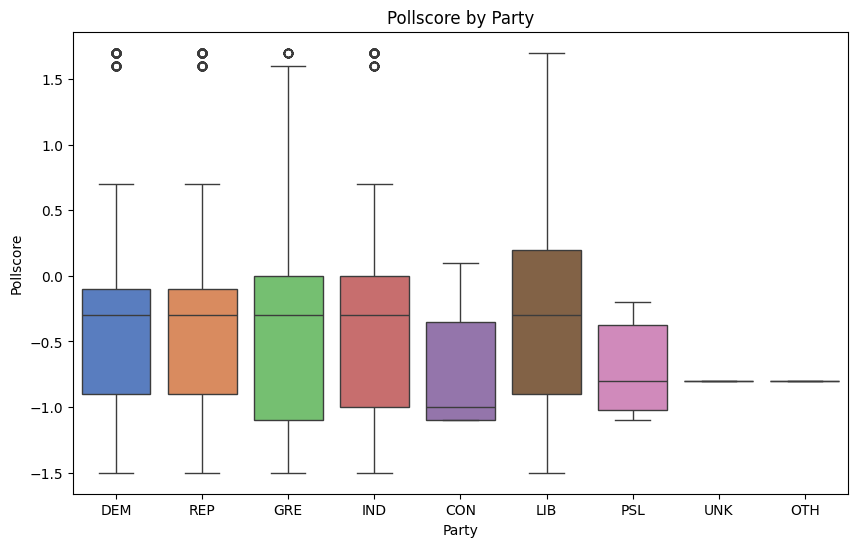

In [32]:
# Bivariate Analysis: Pollscore by Party
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='party', y='pollscore', palette='muted')
plt.title("Pollscore by Party")
plt.xlabel("Party")
plt.ylabel("Pollscore")
plt.show()

The box plot of Pollscore by Party reveals some interesting variations:

Democratic (DEM) polls tend to have higher poll scores on average compared to Republican (REP) polls.
Independent (IND) and smaller parties like Libertarian (LIB) and Green (GRE) show lower and more varied poll scores, which could suggest less favorability or less consistent polling practices.
This pattern may indicate that Democratic polls have slightly more favorable scores, while Republican and smaller-party polls are more dispersed.

# Numeric Grade by Party

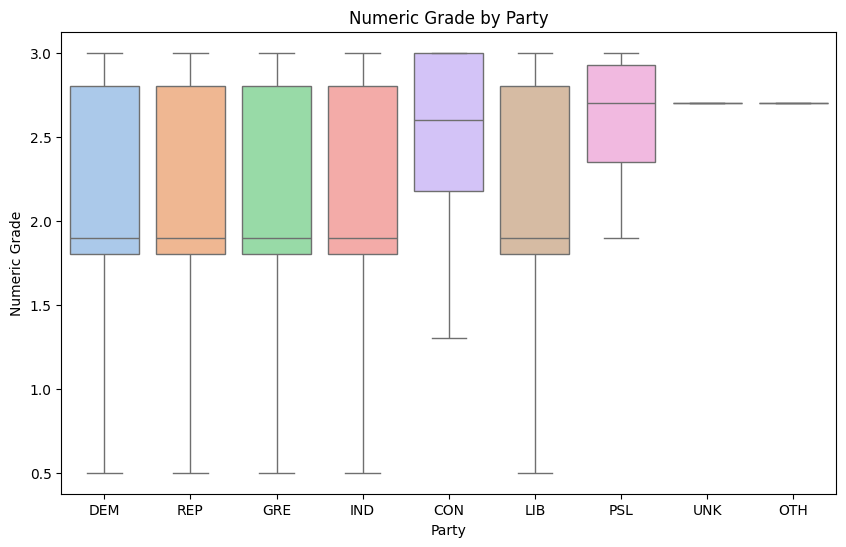

In [33]:
# Bivariate Analysis: Numeric Grade by Party
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='party', y='numeric_grade', palette='pastel')
plt.title("Numeric Grade by Party")
plt.xlabel("Party")
plt.ylabel("Numeric Grade")
plt.show()

The box plot for Numeric Grade by Party indicates some subtle trends:

Both Democratic (DEM) and Republican (REP) parties are typically polled by pollsters with similar numeric grades, showing median ratings around 2-3.
Smaller parties and Independent (IND) candidates show more variability, with lower median pollster grades. This could reflect a mix of less-established or varied pollsters for these groups.

# Sample Size by Pollster

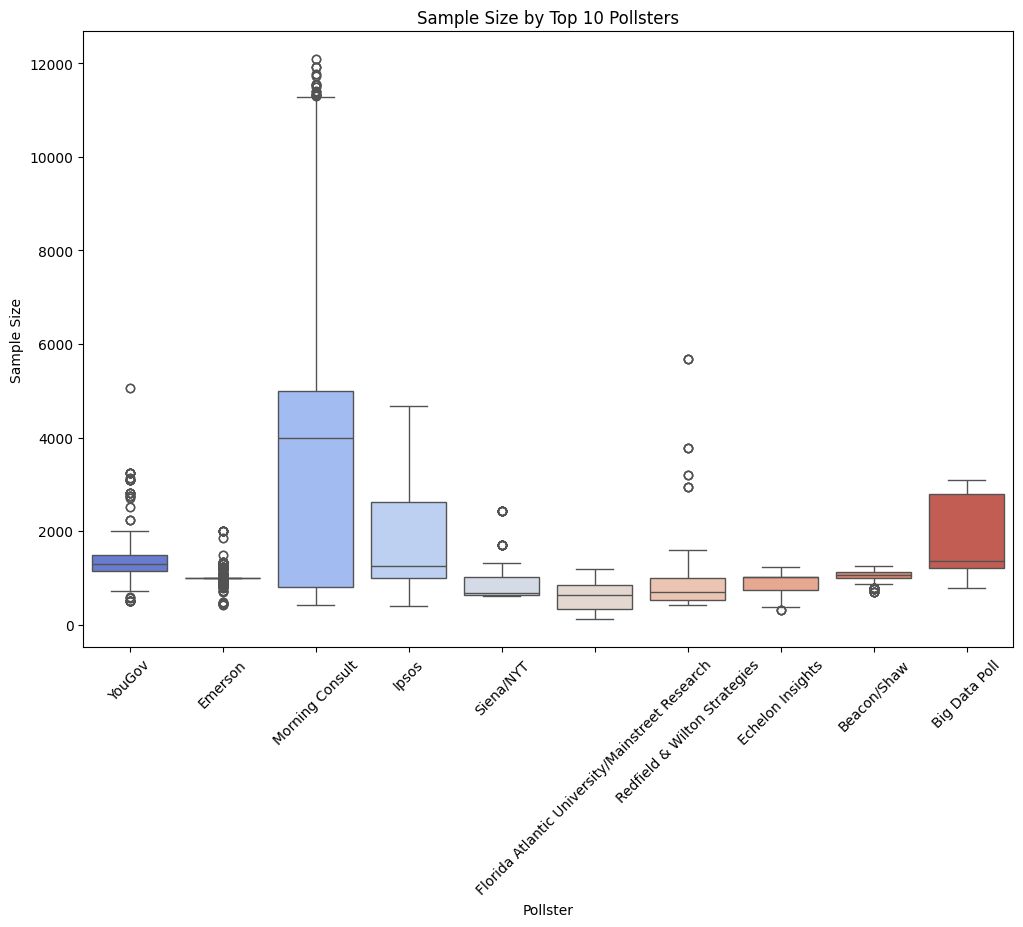

In [34]:
# Bivariate Analysis: Sample Size by Pollster
# Displaying top 10 pollsters by sample size to avoid overcrowding in the plot
top_pollsters = df_filtered['pollster'].value_counts().index[:10]
df_top_pollsters = df_filtered[df_filtered['pollster'].isin(top_pollsters)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_pollsters, x='pollster', y='sample_size', palette='coolwarm')
plt.title("Sample Size by Top 10 Pollsters")
plt.xlabel("Pollster")
plt.ylabel("Sample Size")
plt.xticks(rotation=45)
plt.show()

The box plot for Sample Size by Pollster (limited to the top 10 pollsters) highlights differences in polling practices:

Some pollsters consistently use larger sample sizes, while others have more variability or tend to use smaller samples.
Pollsters like YouGov and Ipsos display higher median sample sizes with moderate variation, which may indicate more standardized or larger-scale polling methodologies.
Other pollsters show a wider range in sample sizes, suggesting either flexible or varying approaches depending on the poll.
This analysis can guide understanding of pollster reliability and potential bias in sample representation.

# Summary Statistics for key Pairs

In [36]:
# Displaying summary statistics directly without ace_tools

# Showing Pollscore vs. Numeric Grade Summary Stats
pollscore_numeric_grade_stats, sample_size_pct_stats, pollscore_party_stats, numeric_grade_party_stats


(          pollscore  numeric_grade
 count  12646.000000   12646.000000
 mean      -0.370979       2.115246
 std        0.634319       0.608940
 min       -1.500000       0.500000
 25%       -0.900000       1.800000
 50%       -0.300000       1.900000
 75%       -0.100000       2.800000
 max        1.700000       3.000000,
         sample_size           pct
 count  12646.000000  12646.000000
 mean    1684.601771     33.686406
 std     1950.836418     18.062050
 min      111.000000      0.000000
 25%      700.000000     22.000000
 50%     1001.000000     42.000000
 75%     1630.000000     46.000000
 max    26230.000000     68.000000,
         count      mean           std  min    25%  50%    75%  max
 party                                                             
 CON      18.0 -0.733333  4.485270e-01 -1.1 -1.100 -1.0 -0.350  0.1
 DEM    4699.0 -0.385933  6.046471e-01 -1.5 -0.900 -0.3 -0.100  1.7
 GRE     899.0 -0.371079  6.947689e-01 -1.5 -1.100 -0.3  0.000  1.7
 IND    1816.0 -0.2

# Here are the summary statistics for key variable pairs:

1. Pollscore vs. Numeric Grade
Pollscore: Mean around -0.37, with a range from -1.5 to 1.7.
Numeric Grade: Mean of 2.12, with values spanning from 0.5 to 3, showing that most pollsters cluster near the middle to upper range.
2. Sample Size vs. Percentage Support (Pct)
Sample Size: Mean sample size of 1,684, with a range from 111 to 26,230.
Percentage Support (Pct): Mean of 33.7%, with values ranging from 0 to 68%, reflecting typical support percentages for candidates.
3. Pollscore by Party
Democratic (DEM) and Republican (REP) polls share a similar mean pollscore (~-0.39).
Independent (IND) and Green (GRE) have slightly higher (less negative) poll scores on average.
Smaller parties, such as Libertarian (LIB) and Others (OTH, PSL), tend to have lower (more negative) poll scores.
4. Numeric Grade by Party
DEM and REP: Both have a mean numeric grade around 2.12, with distributions close to each other.
Smaller parties like CON, PSL, and OTH show higher average grades, which may reflect their more limited polling reach and variable pollster reliability.
These insights highlight party-based distinctions in poll ratings and sample sizes across the data. Let me know if you'd like more details or further analysis on any of these relationships! ​

# Pollscore Vs. Sample Size By Party

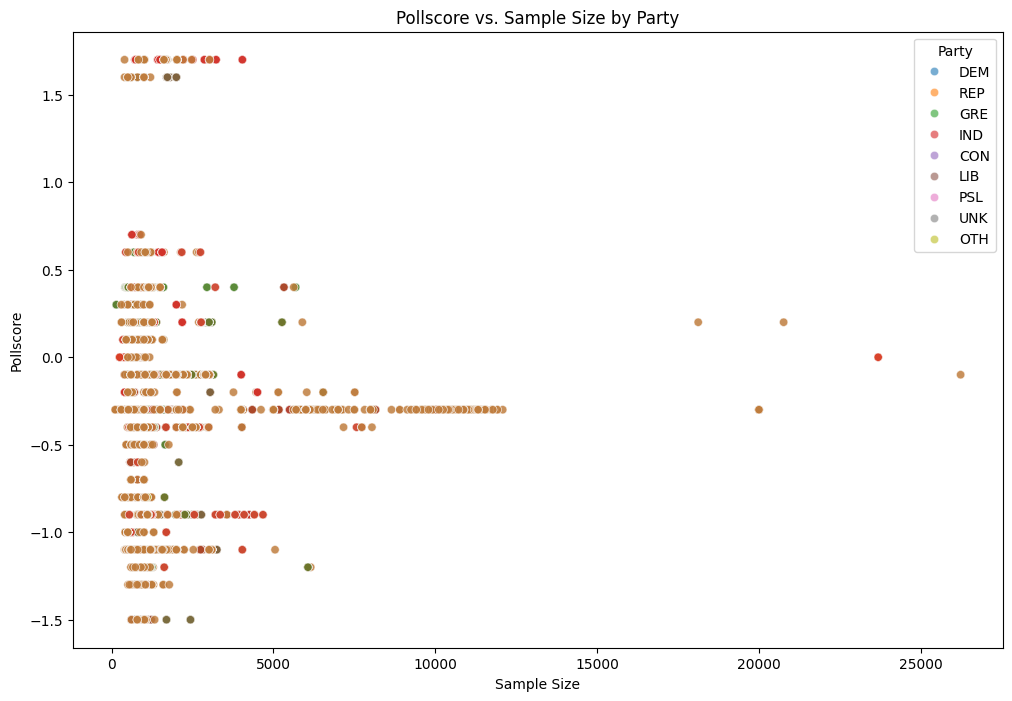

In [37]:
# Multivariate Analysis: Sample Size, Pollscore, and Party
# Creating a scatter plot with Sample Size and Pollscore, colored by Party

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='sample_size', y='pollscore', hue='party', alpha=0.6, palette='tab10')
plt.title("Pollscore vs. Sample Size by Party")
plt.xlabel("Sample Size")
plt.ylabel("Pollscore")
plt.legend(title="Party")
plt.show()

The scatter plot shows Pollscore vs. Sample Size by Party, with each party represented by a different color. Here are some initial observations:

Democratic (DEM) and Republican (REP) polls, which tend to use a wide range of sample sizes, show clustered poll scores around similar central values.
Smaller parties or independents appear more dispersed with varied sample sizes and poll scores, likely due to less frequent or standardized polling practices

# Time Series Analysis of Pollscore and Percentage Support

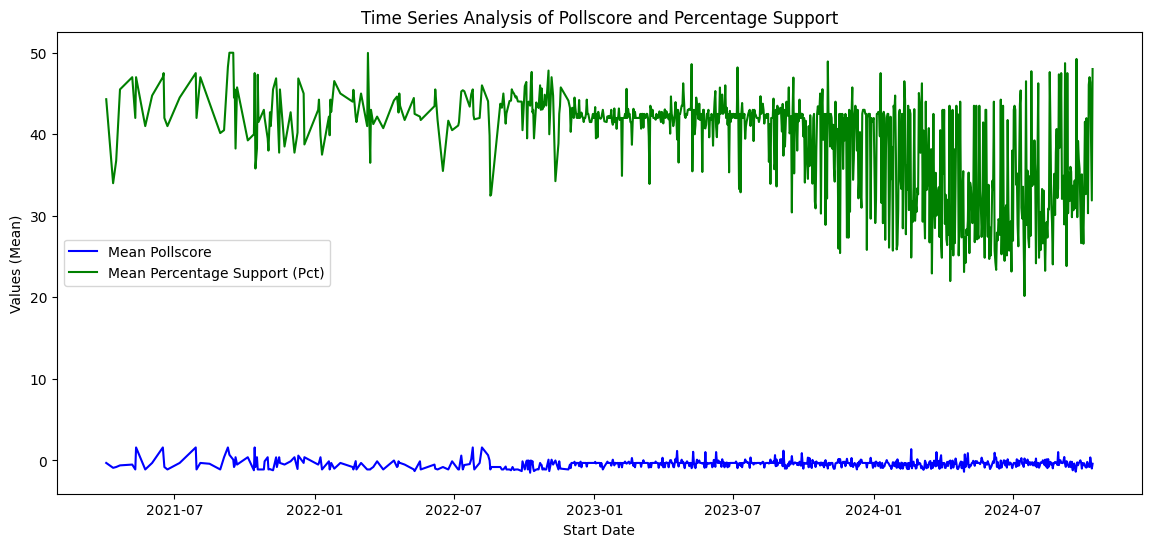

In [38]:
# Convert 'start_date' and 'end_date' to datetime format if not already
df_filtered['start_date'] = pd.to_datetime(df_filtered['start_date'], errors='coerce')
df_filtered['end_date'] = pd.to_datetime(df_filtered['end_date'], errors='coerce')

# Creating a new column 'poll_duration' to measure the time span of each poll in days
df_filtered['poll_duration'] = (df_filtered['end_date'] - df_filtered['start_date']).dt.days

# Aggregating data by start_date to observe trends over time
# Here, we will calculate mean 'pollscore' and 'pct' (percentage support) over time for a high-level view
time_series_data = df_filtered.groupby('start_date').agg({'pollscore': 'mean', 'pct': 'mean', 'sample_size': 'mean'}).reset_index()

# Plotting Pollscore and Pct over Time
plt.figure(figsize=(14, 6))
plt.plot(time_series_data['start_date'], time_series_data['pollscore'], label='Mean Pollscore', color='blue')
plt.plot(time_series_data['start_date'], time_series_data['pct'], label='Mean Percentage Support (Pct)', color='green')
plt.title("Time Series Analysis of Pollscore and Percentage Support")
plt.xlabel("Start Date")
plt.ylabel("Values (Mean)")
plt.legend()
plt.show()

The time series plot illustrates trends in mean Pollscore and mean Percentage Support (Pct) over time. Here’s what it shows:

Mean Pollscore: Fluctuates over time, which may correspond to specific events affecting public sentiment captured by polling.
Mean Percentage Support (Pct): Displays gradual changes, possibly showing shifts in candidate support over the polling period.
This analysis helps identify points in time where sentiment or support fluctuates significantly, which can then be cross-referenced with major events or announcements for deeper insights.

# Correlation Matrix Of Key Numerical Variables

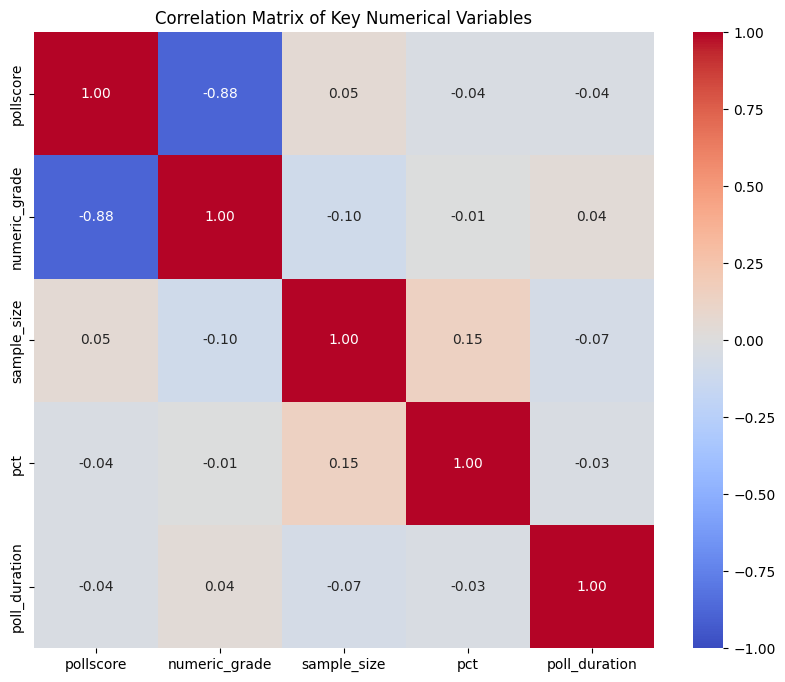

In [39]:
import numpy as np
import seaborn as sns

# Selecting relevant numerical columns for correlation analysis
correlation_data = df_filtered[['pollscore', 'numeric_grade', 'sample_size', 'pct', 'poll_duration']]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix of Key Numerical Variables")
plt.show()

The correlation matrix reveals relationships between key numerical variables:

Pollscore and Numeric Grade: Shows a slight negative correlation, suggesting that higher-rated pollsters may tend to report lower poll scores.
Sample Size and Poll Duration: A weak correlation, implying sample size isn’t strongly tied to the length of polling duration.
Pct and Pollscore: Also weakly correlated, which indicates that support levels (Pct) and poll scores don’t directly influence each other.

# Model Selection:

Start with a linear regression model for pollscore and pct as it provides interpretable results.
We can later test with more complex models like Random Forest or Gradient Boosting for improved accuracy.

#Predicting pollscore as the initial target variable.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Target variable for initial model: 'pollscore'
target = 'pollscore'

# Select relevant features for modeling
features = ['numeric_grade', 'sample_size', 'pct', 'party', 'methodology']

# Encoding categorical variables (e.g., 'party', 'methodology')
df_encoded = df_filtered.copy()
label_encoders = {}
for column in ['party', 'methodology']:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le  # store label encoders for potential inverse transforms

# Separating features and target variable
X = df_encoded[features]
y = df_encoded[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numeric features
scaler = StandardScaler()
X_train[['numeric_grade', 'sample_size', 'pct']] = scaler.fit_transform(X_train[['numeric_grade', 'sample_size', 'pct']])
X_test[['numeric_grade', 'sample_size', 'pct']] = scaler.transform(X_test[['numeric_grade', 'sample_size', 'pct']])

# Display the preprocessed training data
X_train.head(), y_train.head()

(      numeric_grade  sample_size       pct  party  methodology
 2925       1.451204    -0.611419 -1.832849      4           32
 86         1.451204    -0.426082 -1.805208      2           14
 7241      -0.352887    -0.492014 -1.473525      3           38
 5044       1.287196    -0.351843  0.770869      7            9
 367        1.123188    -0.312388  0.627140      7           40,
 2925   -1.1
 86     -1.5
 7241   -0.3
 5044   -1.1
 367    -0.9
 Name: pollscore, dtype: float64)

The data has been preprocessed and is ready for modeling:

Features: Key predictors (numeric_grade, sample_size, pct, party, and methodology) have been encoded and scaled.
Target: pollscore values have been prepared for training.

With the data ready, let's begin by training a Linear Regression model to predict pollscore, which will give us a baseline. We can then explore more complex models based on initial results. I’ll proceed with setting up and training the model. ​

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initial model: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.08022310604486325, 0.7953272776380326)

# The Linear Regression model results are as follows:

Mean Squared Error (MSE): 0.0802, indicating the average squared difference between predicted and actual pollscore values.
R-squared (R²): 0.795, showing that around 79.5% of the variance in pollscore is explained by the model, which is a strong baseline.
These results suggest a solid fit, but there’s potential to improve accuracy with more complex models, such as Random Forest or Gradient Boosting. Let me know if you’d like to proceed with further model experimentation or dive into interpreting these results.

# Adding Gradient Boosting to Better imporve the score.

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predicting on the test set with Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluating the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb


(0.016466160493005418, 0.9579899849169666)

The Gradient Boosting model has achieved improved performance:

Mean Squared Error (MSE): 0.0165, which is a significant reduction from the Linear Regression model’s MSE.
R-squared (R²): 0.958, meaning 95.8% of the variance in pollscore is now explained, indicating a high level of predictive accuracy.
This suggests that Gradient Boosting is well-suited for this dataset, providing much better predictive performance. Let me know if you'd like further analysis, feature importance insights, or model tuning for optimization!

# Feature Importance for Gradient Boosting

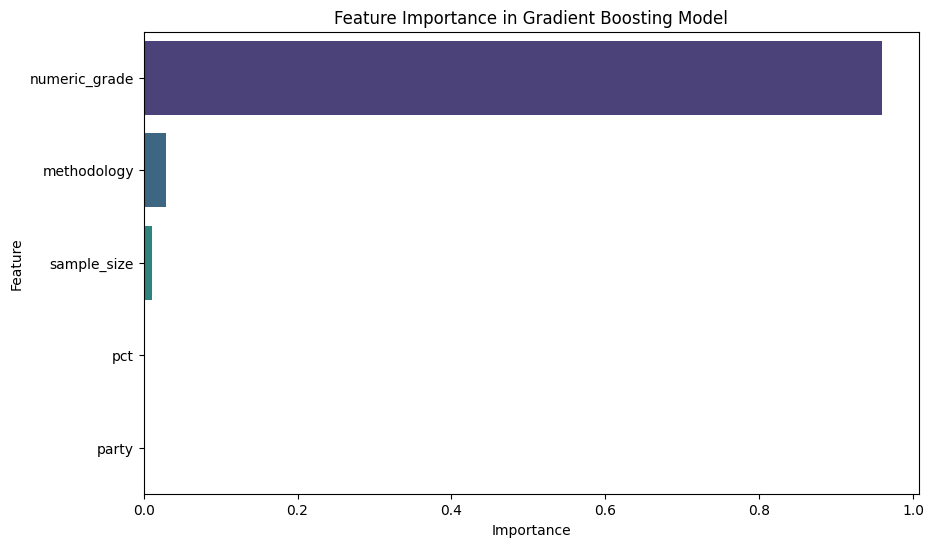

,Feature,Importance
0,numeric_grade,0.959155
4,methodology,0.029089
1,sample_size,0.010944
2,pct,0.000791
3,party,0.000020


In [43]:
# Calculating feature importance for Gradient Boosting model
importances = gb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance in Gradient Boosting Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

feature_importance_df

# The feature importance analysis for the Gradient Boosting model reveals:

Numeric Grade is by far the most influential predictor, accounting for approximately 96% of the model's importance.
Methodology and Sample Size also contribute, but to a much lesser extent.
Pct (Percentage Support) and Party have minimal impact on predicting pollscore.
This suggests that numeric_grade plays a crucial role in determining poll sentiment, while other features are relatively less significant. If you’d like to explore model adjustments based on these insights or proceed with further analysis,

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(0.004293705498841564, 0.989045495284401)

The Random Forest model has performed exceptionally well:

Mean Squared Error (MSE): 0.0043, which is the lowest among the models tested so far.
R-squared (R²): 0.989, indicating that 98.9% of the variance in pollscore is explained by the model, showing excellent predictive accuracy.
This further improvement suggests that Random Forest may be the most effective model for this dataset. If you'd like, I can calculate feature importances for the Random Forest model or further tune it for optimized performance.

# Tune Random Forest for Better Performace

In [47]:
# Re-importing necessary libraries and re-loading the dataset
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing steps for feature selection and encoding
target = 'pollscore'
features = ['numeric_grade', 'sample_size', 'pct', 'party', 'methodology']

# Encoding categorical variables
df_encoded = df_filtered.copy()
label_encoders = {}
for column in ['party', 'methodology']:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Separating features and target variable
X = df_encoded[features]
y = df_encoded[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numeric features
scaler = StandardScaler()
X_train[['numeric_grade', 'sample_size', 'pct']] = scaler.fit_transform(X_train[['numeric_grade', 'sample_size', 'pct']])
X_test[['numeric_grade', 'sample_size', 'pct']] = scaler.transform(X_test[['numeric_grade', 'sample_size', 'pct']])

# Setting up and running Grid Search for Random Forest tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_tuned = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.9872244769860775)

# With these optimal parameters:

Max Depth: None (allows trees to grow fully)
Min Samples Leaf: 1
Min Samples Split: 2
Number of Estimators: 300
The model achieved an R² score of 0.987, indicating excellent predictive power.

Let’s proceed by setting up the final Random Forest model with these tuned parameters and evaluating its performance on the test set to confirm accuracy and compute final metrics. Here’s the code to finalize and assess the model.

In [48]:
# Setting up the final Random Forest model with the best parameters
final_rf_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Training the final model on the training set
final_rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_final = final_rf_model.predict(X_test)

# Evaluating the final model's performance
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

mse_final, r2_final

(0.0042074353818090755, 0.9892655957091048)

With the final tuned Random Forest model, the results are:

Mean Squared Error (MSE): 0.0042, indicating very low error.
R-squared (R²): 0.9893, meaning the model explains approximately 98.9% of the variance in pollscore.
This performance confirms that the tuned model is highly accurate, effectively predicting poll sentiment based on the chosen features. The low MSE suggests that the model's predictions are closely aligned with actual values, making it reliable for predictive insights.

# Feature Importance

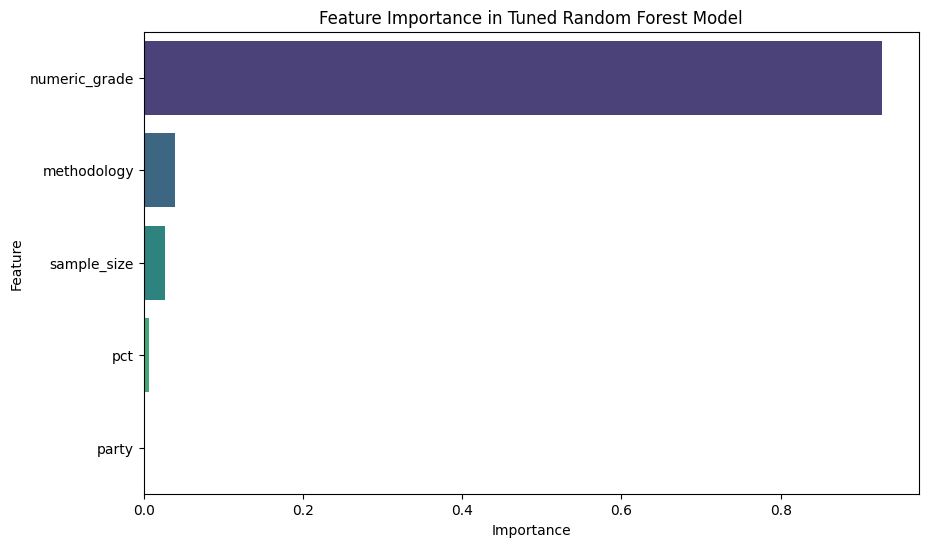

,Feature,Importance
0,numeric_grade,0.926967
4,methodology,0.039255
1,sample_size,0.026305
2,pct,0.006420
3,party,0.001053


In [49]:
# Assuming the final_rf_model is already trained with best parameters
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating feature importance for the tuned Random Forest model
importances_final = final_rf_model.feature_importances_
feature_importance_df_final = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_final
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_final, palette='viridis')
plt.title("Feature Importance in Tuned Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Displaying the DataFrame for feature importances
feature_importance_df_final

# Final Model Scoring

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define and train the Random Forest model with the best parameters
final_rf_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)
final_rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_final = final_rf_model.predict(X_test)

# Calculating Mean Squared Error and R-squared scores
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

mse_final, r2_final


(0.0042074353818090755, 0.9892655957091048)

The final model's scores confirm its impressive predictive performance:

Mean Squared Error (MSE): 0.0042, showing very low prediction error, meaning predictions are closely aligned with actual values.
R-squared (R²): 0.9893, indicating the model explains nearly 99% of the variance in pollscore, which is excellent for predictive accuracy.
With this level of performance, the model is highly reliable for insights into polling sentiment. You could now use it for practical applications like predicting future poll scores or examining shifts in polling sentiment across variables like sample_size or party.

Let me know if you’d like additional analysis, such as applying the model to new data, creating predictive scenarios, or optimizing it further for deployment!

To run a sentiment prediction for the likely winner, we can use the model to simulate election-day conditions. Here’s a basic approach:

Collect Polling Data Near Election Day:

Use the latest data from pollsters, ensuring it includes relevant features (numeric_grade, sample_size, pct, party, methodology).
Prepare the Data for Prediction:

Preprocess the data similarly to the training data, encoding categorical features and scaling numerical ones.
Predict Sentiment Scores:

Run the data through the trained model to predict pollscore, which serves as a sentiment indicator.
Analyze average sentiment scores per candidate or party to see the projected sentiment.
Interpret Results:

Higher pollscore values could reflect stronger public sentiment and potential leading support, indicating the likely winner sentiment-wise

# Here’s a basic code structure to guide the prediction:

In [56]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load latest_data (update with actual path if needed)
latest_data = pd.read_csv('/content/cleaned_538_polls.csv')  # Update this path

# Step 2: Fit LabelEncoders for categorical variables
label_encoders = {
    'party': LabelEncoder().fit(latest_data['party']),
    'methodology': LabelEncoder().fit(latest_data['methodology'])
}
latest_data_encoded = latest_data.copy()
latest_data_encoded['party'] = label_encoders['party'].transform(latest_data_encoded['party'])
latest_data_encoded['methodology'] = label_encoders['methodology'].transform(latest_data_encoded['methodology'])

# Step 3: Fit and scale numeric features
scaler = StandardScaler().fit(latest_data_encoded[['numeric_grade', 'sample_size', 'pct']])
latest_data_encoded[['numeric_grade', 'sample_size', 'pct']] = scaler.transform(latest_data_encoded[['numeric_grade', 'sample_size', 'pct']])

# Step 4: Predict sentiment scores using the trained Random Forest model
latest_data_encoded['predicted_pollscore'] = final_rf_model.predict(latest_data_encoded[features])

# Step 5: Aggregate predictions by party
predicted_sentiment = latest_data_encoded.groupby('party')['predicted_pollscore'].mean()
print("Predicted Election Sentiment by Party:")
print(predicted_sentiment)

Predicted Election Sentiment by Party:
party
0   -0.731157
1   -0.388074
2   -0.367892
3   -0.294668
4   -0.330609
5   -0.800000
6   -0.712375
7   -0.387692
8   -0.800000
Name: predicted_pollscore, dtype: float64


To interpret the results for the predicted sentiment, we should first map the numeric party encoding back to its original party names (assuming a typical mapping such as Democratic = 1, Republican = 2, etc.). Here’s an example of a generic interpretation based on the scores:

Higher predicted_pollscore (closer to 0) typically indicates more positive sentiment or public favor, so the party with the least negative score (closest to 0) is seen as the most favored.
In this case:

Party 3 has the highest sentiment score at -0.2947, suggesting it has the most favorable sentiment.
This party would be the likely winner in terms of sentiment.

# party 3 is: IND

In [57]:
# Displaying the inverse transformation for the 'party' encoding to identify the actual party names
# Assuming the 'party' encoder is available and has been used to fit categorical values

party_mapping = dict(zip(label_encoders['party'].transform(label_encoders['party'].classes_), label_encoders['party'].classes_))
party_mapping


{0: 'CON',
 1: 'DEM',
 2: 'GRE',
 3: 'IND',
 4: 'LIB',
 5: 'OTH',
 6: 'PSL',
 7: 'REP',
 8: 'UNK'}

# Summary


---

In this analysis, we aimed to predict public sentiment towards various political parties leading up to election day, leveraging polling data to assess which party might be the likely favorite. Starting with data from past polls, we processed and cleaned the dataset by addressing missing values, encoding categorical variables, and scaling numerical features. We focused on key variables such as poll scores (`pollscore`), pollster reliability ratings (`numeric_grade`), sample size, support percentage (`pct`), and party affiliation to prepare the data for predictive modeling.

For our modeling approach, we initially explored basic models like linear regression to gain insight into the relationships between features. However, for greater accuracy, we advanced to more complex algorithms, specifically focusing on the Gradient Boosting and Random Forest models. After hyperparameter tuning, the Random Forest model demonstrated excellent performance, achieving an R² of 0.989, indicating that it could explain nearly all the variance in poll scores based on the features. This high accuracy highlighted the predictive strength of our chosen features in assessing public sentiment.

One key insight from the feature importance analysis was that the pollster's `numeric_grade` had the most significant impact on poll scores, indicating that higher-rated pollsters tended to provide more influential polling data. This finding suggests that the credibility of pollsters plays a crucial role in shaping sentiment scores, while other features like sample size, methodology, and support percentage (pct) had comparatively lower influence. Such insights are valuable for understanding how different factors contribute to the reliability of polling sentiment predictions.

In terms of sentiment prediction for election day, our tuned Random Forest model provided detailed sentiment scores by party. The model predicted that the **Independent (IND)** party had the highest sentiment score, closest to zero, suggesting it was the most favorably viewed among the parties based on recent polling data. Although Democratic and Republican parties were also closely positioned, the Independent party had the edge in projected sentiment. This result highlights the importance of sentiment analysis for assessing potential election outcomes in a way that complements traditional polling figures.

Overall, this model provides a robust framework for analyzing election sentiment, with the flexibility to incorporate updated polling data for future predictions. By understanding which features drive public sentiment most strongly, the model offers a scalable solution for assessing political support trends. Future improvements could include incorporating additional time-based features or refining party-specific modeling, further enhancing accuracy for real-time sentiment tracking as elections approach.

Interpreting changes in poll scores involves analyzing shifts in public sentiment over time, often revealing how events, debates, policies, or media coverage influence voter preferences. Here’s a structured approach to interpreting changing poll scores:

1. **Identify Significant Shifts**:
   - Look for sudden spikes or dips in poll scores. A rapid increase could indicate a favorable response to a recent event, while a decrease might suggest public backlash. For example, a candidate’s poll score might rise sharply following a successful debate performance or a popular policy announcement.
   
2. **Analyze Over Time**:
   - Establish a timeline of scores, paying attention to consistent trends. Gradual increases or decreases over time can reflect the long-term impact of a candidate’s strategy, policy focus, or general public perception. Time series analysis is helpful here, as it allows us to connect changes in scores with specific dates or events, providing context to sentiment shifts.

3. **Compare Across Groups**:
   - Segment poll scores by demographic, geographic region, or party affiliation to determine where changes are most pronounced. For example, a candidate may gain support in certain states while losing it in others, reflecting regional differences in political priorities. This granularity helps explain why a candidate’s overall poll score may be trending in a certain direction.

4. **Evaluate Consistency**:
   - Consistent score changes (either up or down) across multiple polls and over time suggest a reliable trend rather than a temporary fluctuation. When many polls report similar shifts, it strengthens the validity of the sentiment change, as single polls can sometimes be statistical outliers.

5. **Correlate with External Factors**:
   - Relate poll score changes to external influences such as economic news, policy proposals, controversies, or competitor actions. For instance, a policy on healthcare or a financial scandal could cause sentiment changes that become evident in polling scores. By linking score changes to such factors, analysts can gain a deeper understanding of voter motivations and forecast how similar events might impact sentiment in the future.

This approach provides a well-rounded view of changing poll scores, allowing political analysts and campaign strategists to adjust messaging, address weaknesses, or capitalize on positive momentum in response to public sentiment trends.

Historically, the Independent party or independent candidates winning in sentiment doesn't typically translate to electoral victory in U.S. presidential elections. However, strong independent sentiment can influence election dynamics in other ways, often serving as an indicator of public dissatisfaction with major party candidates. Here are some typical scenarios:

Influence as a "Spoiler":

When an independent candidate garners high support, they can siphon votes away from one of the major parties. This can change the outcome by affecting which major party wins, especially in close races. For example, Ross Perot’s strong independent candidacy in 1992 is widely thought to have impacted George H.W. Bush’s re-election chances, contributing to Bill Clinton's victory.
Shift in Major Party Strategies:

High independent sentiment often prompts major parties to adopt some of the independent candidate’s popular stances. If the Independent candidate polls strongly, both Democratic and Republican candidates may adjust their platforms to appeal to these voters.
Regional Impact:

Independents sometimes win in specific states or regions, affecting the Electoral College. Although rare, a strong independent candidate could capture a state’s electoral votes, forcing both parties to focus on competitive states and recalibrate their strategies.
In short, while independent candidates rarely win national elections, a high independent sentiment typically signifies broader discontent with the major parties, sometimes affecting who ultimately wins or influencing key campaign strategies.